In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

df = pd.read_csv("iot_dataset.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
#Assigning labels to each crop
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

Text(0.5, 1.05, 'Correlation of df Features')

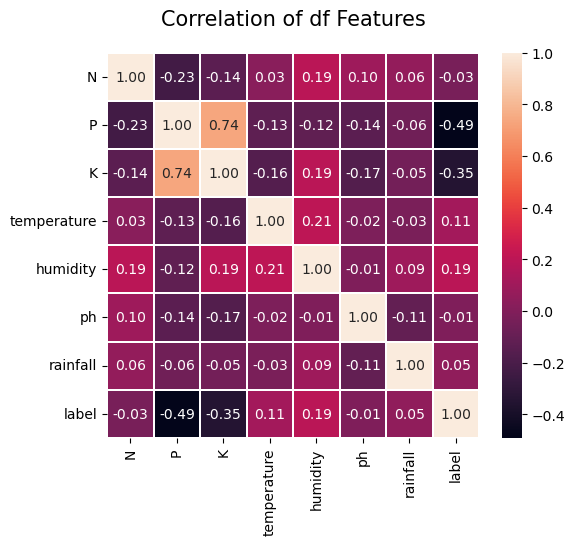

In [5]:
#Plotting the correlation matrix
corr = df.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)

In [6]:
x = df[['N','P','K','temperature','humidity','ph','rainfall']].values
y = df['label'].values

In [7]:
#Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
model2 = []
acc2 = []

In [9]:
#Classification Models - Decision Tree
dt = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
print('MSE :', metrics.mean_squared_error(y_test,y_pred))
print('RMAE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R^2 :",r2_score(y_test,y_pred))
accuracy_train = dt.score(x_train, y_train)
accuracy_test = dt.score(x_test, y_test)
print("Training Accuracy : ",accuracy_train)
print("Testing Accuracy : ",accuracy_test)
acc2.append(x)
model2.append('Decision Tree')

MAE : 0.6681818181818182
MSE : 7.0227272727272725
RMAE : 2.6500428812997106
R^2 : 0.826356582810962
Training Accuracy :  0.9323863636363636
Testing Accuracy :  0.925


In [10]:
#Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
print('MSE :', metrics.mean_squared_error(y_test,y_pred))
print('RMAE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R^2 :",r2_score(y_test,y_pred))
accuracy_train = nb.score(x_train, y_train)
accuracy_test = nb.score(x_test, y_test)
print("Training Accuracy : ",accuracy_train)
print("Testing Accuracy : ",accuracy_test)
acc2.append(x)
model2.append('Naive Bayes')

MAE : 0.08181818181818182
MSE : 0.9818181818181818
RMAE : 0.9908673886137246
R^2 : 0.9757236387619209
Training Accuracy :  0.9954545454545455
Testing Accuracy :  0.9931818181818182


In [11]:
#Support Vector Machines
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,y_train)
y_pred = SVM.predict(x_test_norm)
x = metrics.accuracy_score(y_test, y_pred)
print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
print('MSE :', metrics.mean_squared_error(y_test,y_pred))
print('RMAE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R^2 :",r2_score(y_test,y_pred))
print("Testing Accuracy : ",x)
acc2.append(x)
model2.append('SVM')

MAE : 0.16136363636363638
MSE : 1.6522727272727273
RMAE : 1.2854076113329682
R^2 : 0.9591460309720289
Testing Accuracy :  0.9818181818181818


In [12]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
print('MSE :', metrics.mean_squared_error(y_test,y_pred))
print('RMAE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R^2 :",r2_score(y_test,y_pred))
accuracy_train = logreg.score(x_train, y_train)
accuracy_test = logreg.score(x_test, y_test)
print("Training Accuracy : ",accuracy_train)
print("Testing Accuracy : ",accuracy_test)
acc2.append(x)
model2.append('Logistic Regression')

MAE : 0.29772727272727273
MSE : 3.034090909090909
RMAE : 1.741864205123611
R^2 : 0.9249793003406583
Training Accuracy :  0.9693181818181819
Testing Accuracy :  0.9681818181818181


In [13]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=20, random_state=0)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
print('MSE :', metrics.mean_squared_error(y_test,y_pred))
print('RMAE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R^2 :",r2_score(y_test,y_pred))
accuracy_train = rfc.score(x_train, y_train)
accuracy_test = rfc.score(x_test, y_test)
print("Training Accuracy : ",accuracy_train)
print("Testing Accuracy : ",accuracy_test)
acc2.append(x)
model2.append('Random Forrest Classifier')

MAE : 0.05454545454545454
MSE : 0.6545454545454545
RMAE : 0.8090398349558905
R^2 : 0.983815759174614
Training Accuracy :  0.9994318181818181
Testing Accuracy :  0.9954545454545455


In [17]:
all_acc = pd.DataFrame(acc2,model2)
all_acc

,0
Decision Tree,0.925000
Naive Bayes,0.993182
SVM,0.981818
Logistic Regression,0.968182
Random Forrest Classifier,0.995455


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

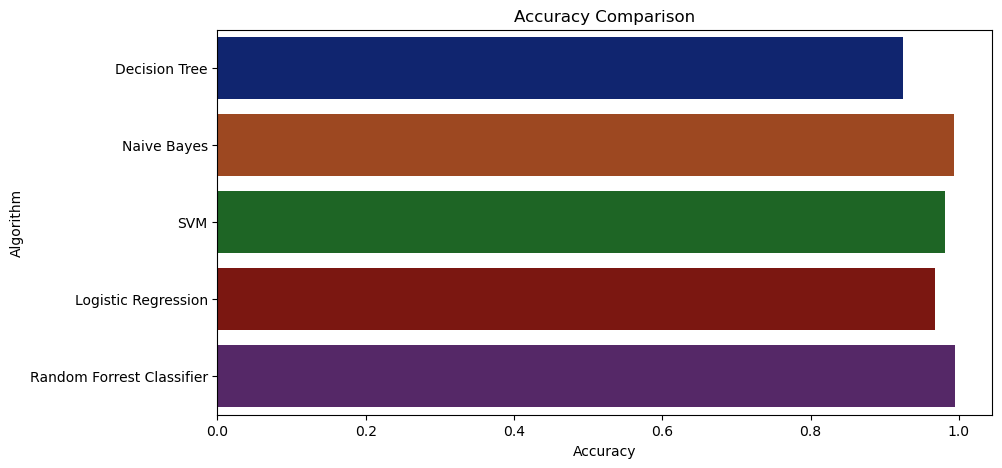

In [14]:
#Comparing the accuracies of each classifying model
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc2,y = model2,palette='dark')

In [18]:
#Predicting the crop with input conditions (using Random Forest Classifier)
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = rfc.predict(data)
res = list(le.inverse_transform(prediction))
print(res[0])

coffee
